### Project description:
+ Finding SMA Crossover Strategy

In [1]:
# project dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from collections import Counter
plt.style.use('fivethirtyeight')

In [2]:
# Creating first test case by initiating the first dataframe for UCO

# URL >> https://query1.finance.yahoo.com/v8/finance/chart/{$symbol}?range={$range}&interval={$interval}
# symbol >> the stock ticker symbol, e.g. AAPL for Apple
# range >> the desired range of the query, allowed parameters are [1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max]
# interval >> the desired interval of the quote, e.g. every 5 minutes, allowed parameters are [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

ENDPOINT = "https://query1.finance.yahoo.com/v8/finance/chart/"

# Stock symbol
symbol = ["AAPL","TSLA"]
def createURL(sym, ran, inter):
    return ENDPOINT+sym+"?"+"range="+ran+"&interval="+inter


# APPLE

In [32]:
# Fetching data
url = createURL(symbol[0], "6mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())



In [33]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


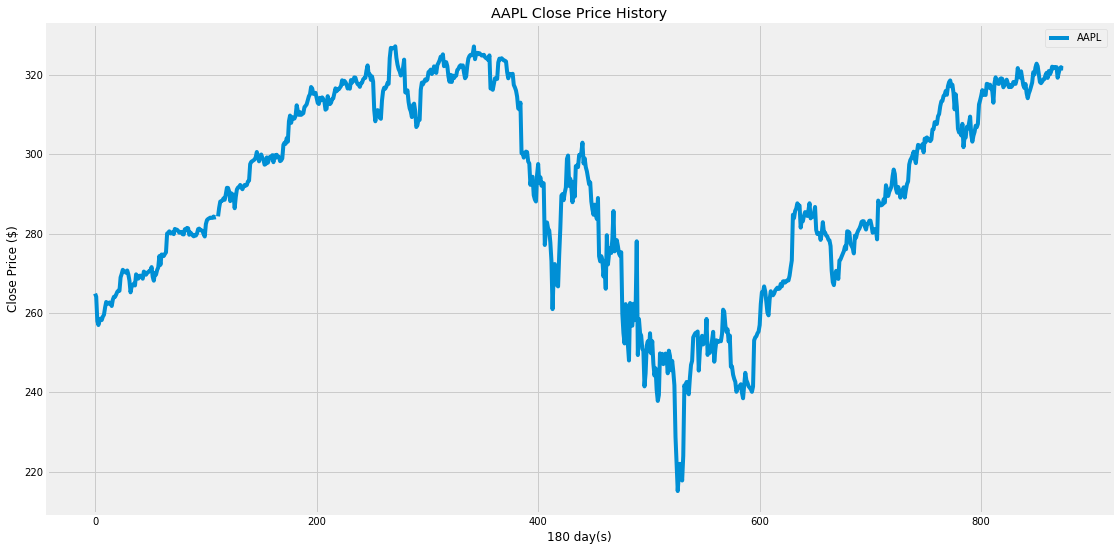

In [34]:
# Plotting the data
plt.figure(figsize=(17, 9))
plt.plot(df['close'], label="AAPL")
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper right")
plt.show()

In [35]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,259.684987
9,259.291653
10,259.143019
11,259.649675
12,260.247586
...,...
870,321.148387
871,321.316162
872,321.450609
873,321.400608


In [36]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean().dropna()
sma_14

,Close Price
13,260.620876
14,260.436591
15,260.268733
16,260.654205
17,261.164211
...,...
870,320.717157
871,320.908870
872,321.055392
873,321.134676


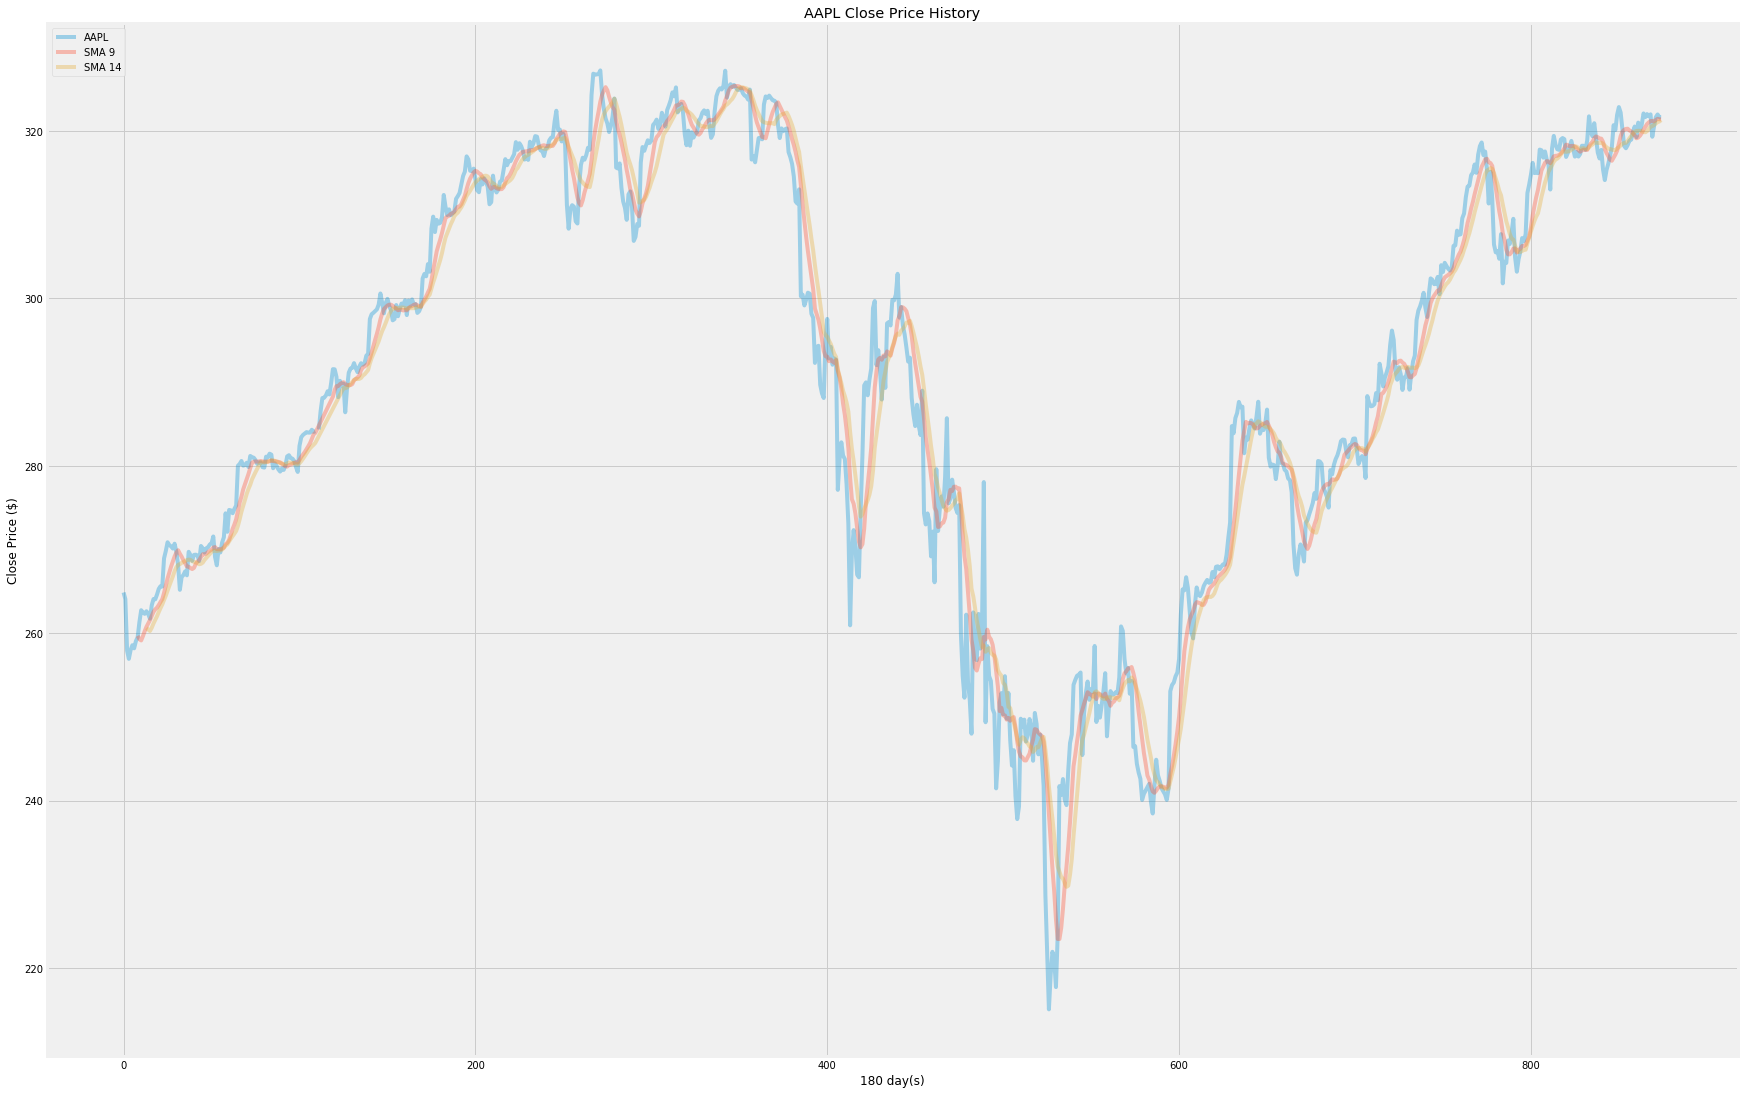

In [37]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(df['close'], label="AAPL", alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14", alpha=.35)
plt.title("AAPL Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [9]:
# Merging all the columns into one table
data = pd.DataFrame()
data['AAPL'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data

,AAPL,SMA 9,SMA 14
0,0.0,NaN,NaN
1,2676157.0,NaN,NaN
2,10646075.0,NaN,NaN
3,3925923.0,NaN,NaN
4,2741210.0,NaN,NaN
...,...,...,...
870,1984956.0,2.645669e+06,3.343761e+06
871,1579829.0,2.507920e+06,3.261244e+06
872,1965809.0,2.530287e+06,3.194344e+06
873,1661443.0,2.471952e+06,2.874203e+06


In [10]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["AAPL"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["AAPL"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [11]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,AAPL,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
1,2676157.0,0.000000e+00,0.000000e+00,0.0,0.0
2,10646075.0,0.000000e+00,0.000000e+00,0.0,0.0
3,3925923.0,0.000000e+00,0.000000e+00,0.0,0.0
4,2741210.0,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...
870,1984956.0,2.645669e+06,3.343761e+06,0.0,0.0
871,1579829.0,2.507920e+06,3.261244e+06,0.0,0.0
872,1965809.0,2.530287e+06,3.194344e+06,0.0,0.0
873,1661443.0,2.471952e+06,2.874203e+06,0.0,0.0


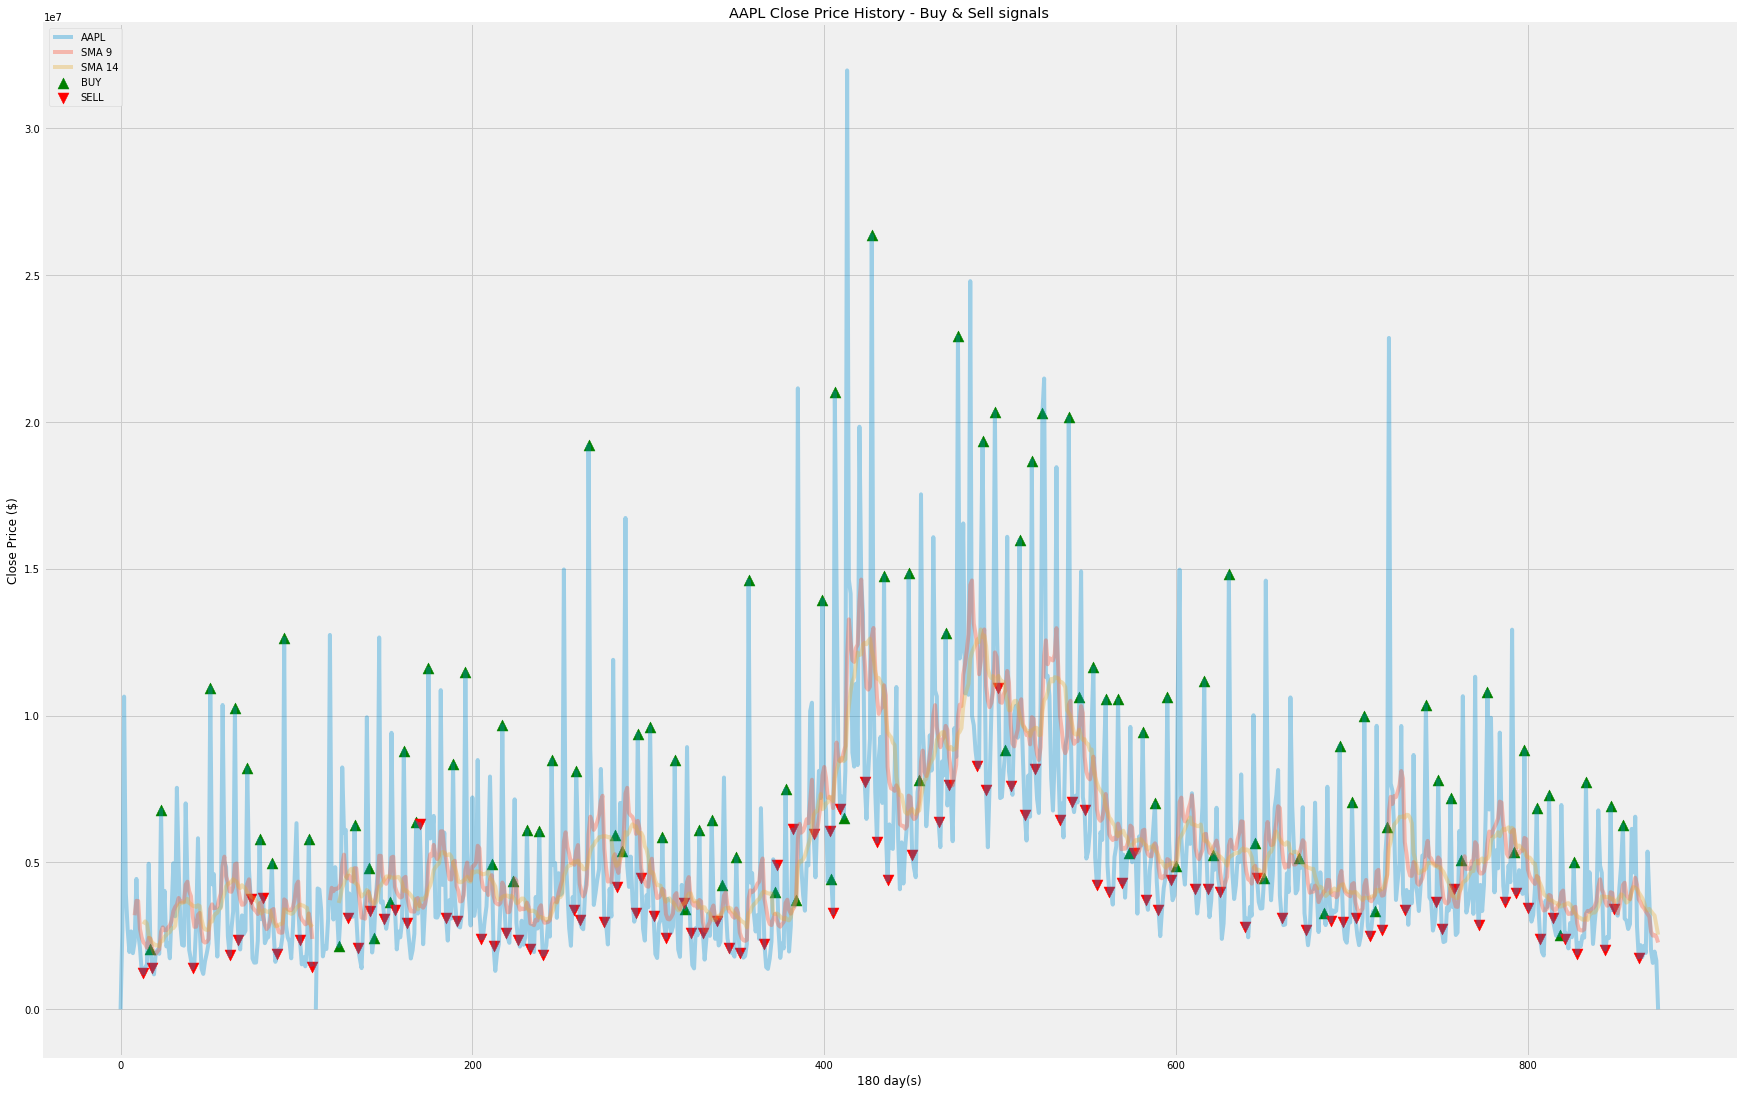

In [12]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(data['AAPL'], label="AAPL", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green',s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red',s=120)
plt.title("AAPL Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

# TESLA

In [13]:
url = createURL(symbol[1], "6mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

In [14]:
# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


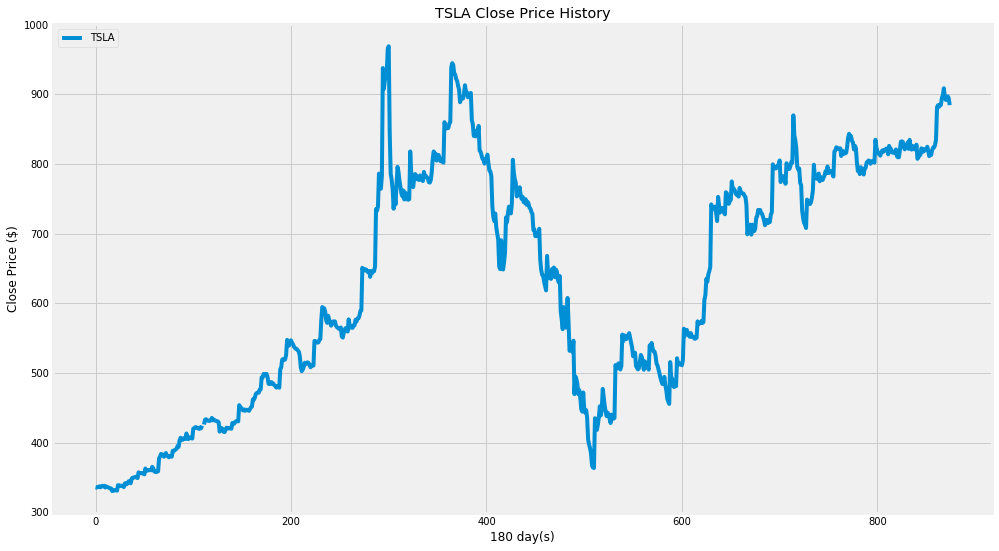

In [15]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="TSLA")
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper left")
plt.show()

In [16]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,336.394423
9,336.655531
10,336.666643
11,336.747755
12,336.754998
...,...
870,891.906257
871,892.758877
872,894.443319
873,895.498406


In [17]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14.dropna()

,Close Price
13,336.385356
14,336.328927
15,336.248928
16,336.103021
17,335.695528
...,...
870,872.728742
871,877.622314
872,882.860883
873,887.664869


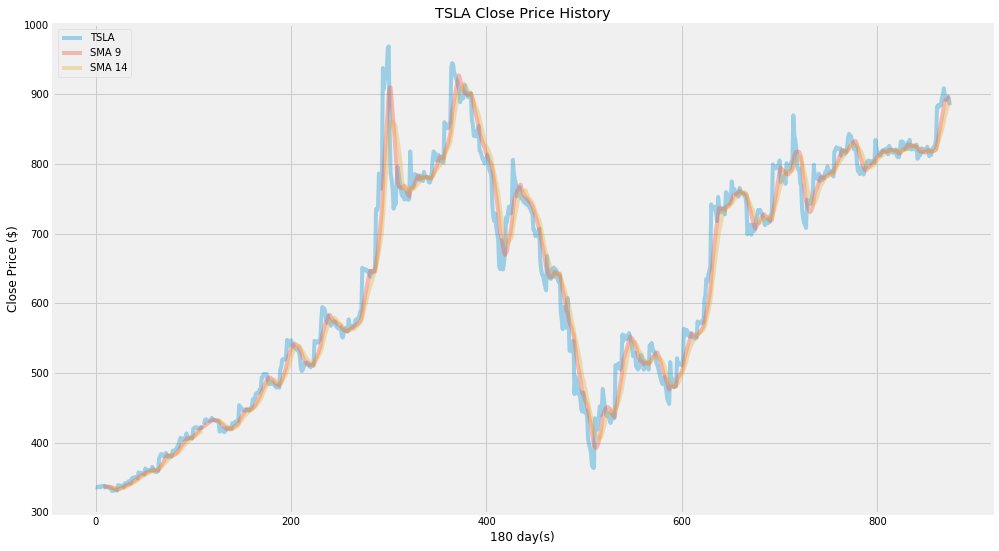

In [18]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="TSLA", alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14",  alpha=.35)
plt.title("TSLA Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [19]:
# Merging all the columns into one table
data = pd.DataFrame()
data['TSLA'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data.dropna()

,TSLA,SMA 9,SMA 14
13,335.700012,336.599467,336.385356
14,334.720001,336.490577,336.328927
15,334.149994,336.190575,336.248928
16,334.077301,335.764720,336.103021
17,330.295105,335.009732,335.695528
...,...,...,...
870,892.000000,891.906257,872.728742
871,892.000000,892.758877,877.622314
872,897.159973,894.443319,882.860883
873,894.495789,895.498406,887.664869


In [20]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["TSLA"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["TSLA"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [21]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,TSLA,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,335.510010,0.000000,0.000000,0.0,0.0
1,335.269989,0.000000,0.000000,0.0,0.0
2,336.119995,0.000000,0.000000,0.0,0.0
3,336.000000,0.000000,0.000000,0.0,0.0
4,337.099792,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...
870,892.000000,891.906257,872.728742,0.0,0.0
871,892.000000,892.758877,877.622314,0.0,0.0
872,897.159973,894.443319,882.860883,0.0,0.0
873,894.495789,895.498406,887.664869,0.0,0.0


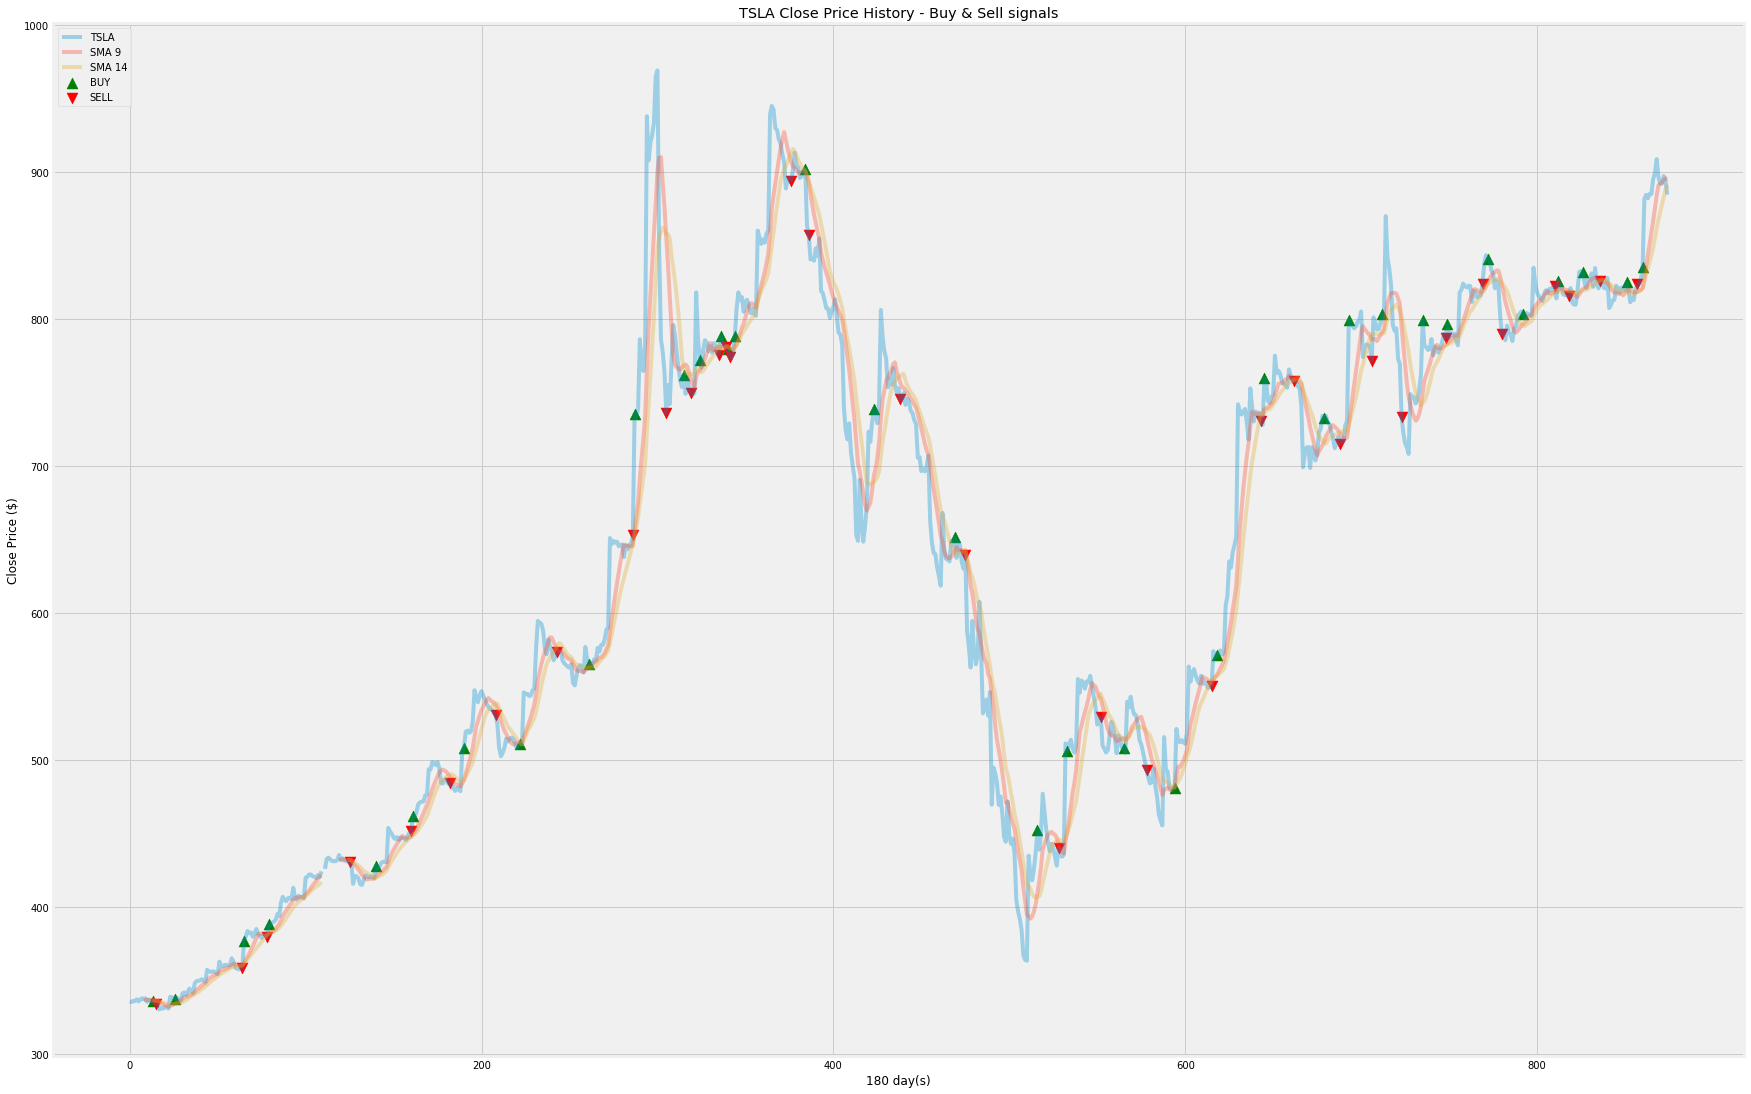

In [22]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(data['TSLA'], label="TSLA", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green', s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red', s=120)
plt.title("TSLA Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

# BTC-USD

In [23]:
url = createURL("BTC-USD", "1mo", "1h")
req = requests.get(url).json()
_rawcolumn_names = list(req['chart']['result'][0])
values = req['chart']['result'][0][_rawcolumn_names[2]]['quote'][0]
cols = list(values.keys())

# Create Dataframe 
df = pd.DataFrame(columns=cols)
df[cols[0]] = values['high']
df[cols[1]] = values['open']
df[cols[2]] = values['close']
df[cols[3]] = values['volume']
df[cols[4]] = values['low']


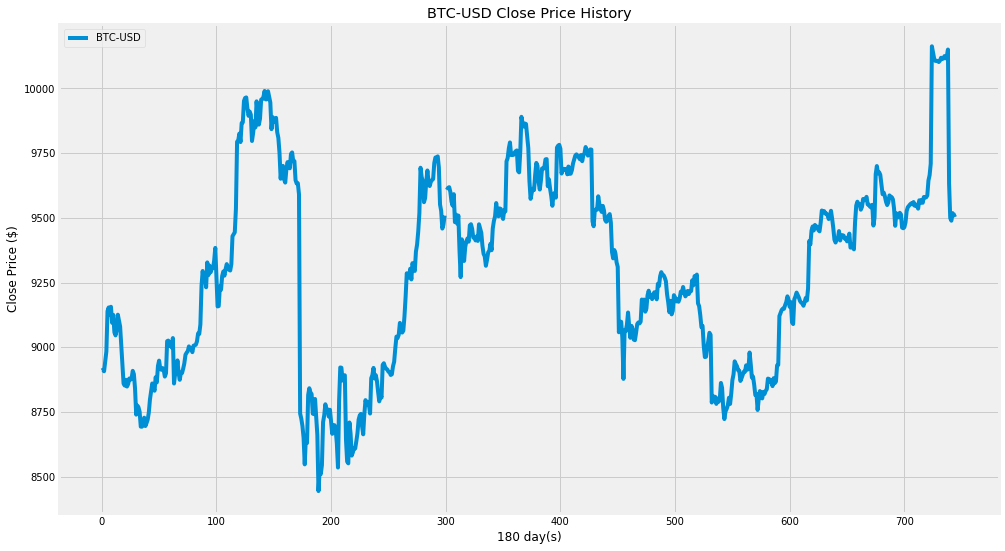

In [24]:
# Plotting the data
plt.figure(figsize=(15, 9))
plt.plot(df['close'], label="BTC-USD")
plt.title("BTC-USD Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc="upper left")
plt.show()

In [25]:
# Create the SMA for 9 days

sma_9 = pd.DataFrame()
sma_9['Close Price'] = df['close'].rolling(window= 9).mean().dropna()

sma_9

,Close Price
8,9026.158203
9,9046.658203
10,9070.267795
11,9086.974718
12,9097.930773
...,...
741,9929.345812
742,9863.159831
743,9795.771267
744,9727.547960


In [26]:
# Create the SMA for 14 days

sma_14 = pd.DataFrame()
sma_14['Close Price'] = df['close'].rolling(window= 14).mean()
sma_14.dropna()

,Close Price
13,9044.630650
14,9060.034877
15,9073.677525
16,9086.014997
17,9090.326381
...,...
741,9993.238560
742,9951.217355
743,9908.547921
744,9866.335310


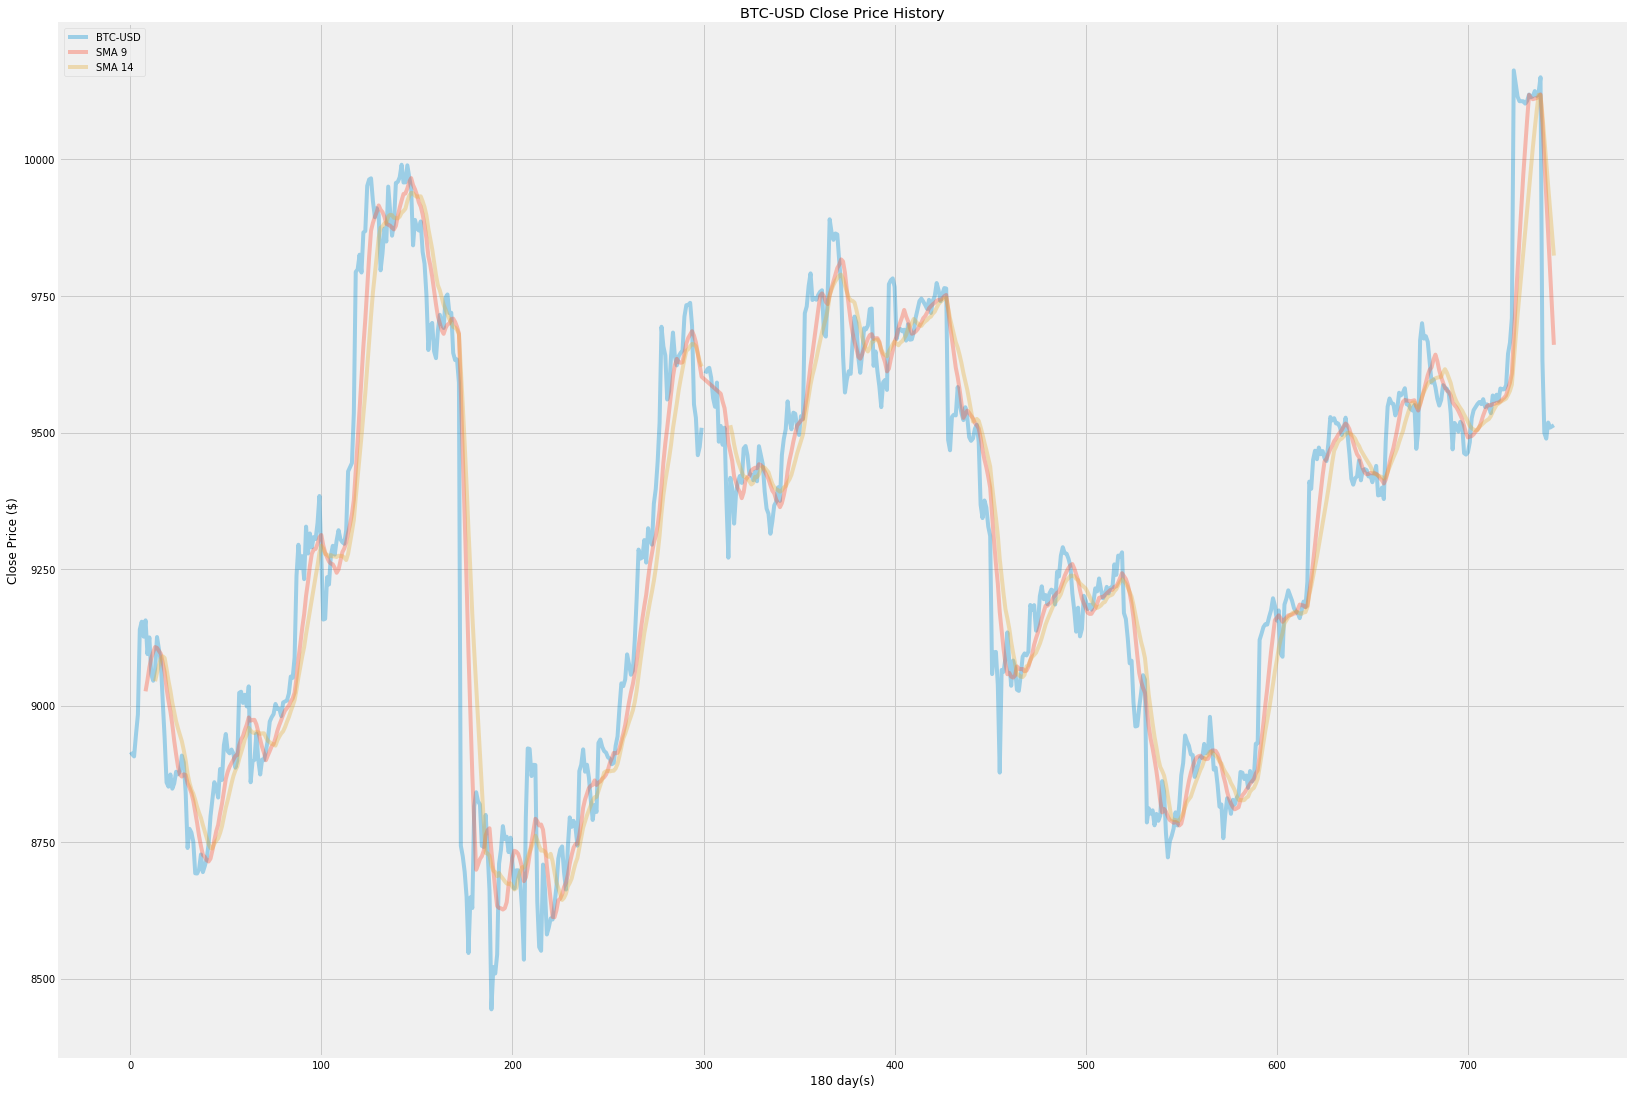

In [27]:
# Plotting the data
plt.figure(figsize=(25, 19))
plt.plot(df['close'], label="BTC-USD",alpha=.35)
plt.plot(sma_9['Close Price'], label="SMA 9", alpha=.35)
plt.plot(sma_14['Close Price'], label="SMA 14",  alpha=.35)
plt.title("BTC-USD Close Price History")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [28]:
# Merging all the columns into one table
data = pd.DataFrame()
data['BTC-USD'] = df['close']
data['SMA 9'] = sma_9['Close Price']
data['SMA 14'] = sma_14['Close Price']
data.dropna()

,BTC-USD,SMA 9,SMA 14
13,9067.182617,9107.216146,9044.630650
14,9125.566406,9105.665256,9060.034877
15,9103.408203,9100.088650,9073.677525
16,9079.724609,9094.914822,9086.014997
17,9007.310547,9078.379449,9090.326381
...,...,...,...
741,9488.819336,9929.345812,9993.238560
742,9518.313477,9863.159831,9951.217355
743,9509.060547,9795.771267,9908.547921
744,9511.176758,9727.547960,9866.335310


In [29]:
# Creating the signal when to buy and sell the stock

def create_signal(data):
    buy_sig_price = []
    sell_sig_price = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA 9'][i] > data['SMA 14'][i]:
            
            if flag != 1:
                
                buy_sig_price.append(data["BTC-USD"][i])
                sell_sig_price.append(np.nan)
                flag = 1
                
            else:
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        elif data['SMA 9'][i] < data['SMA 14'][i]:
            
            if flag != 0:
                    
                buy_sig_price.append(np.nan)
                sell_sig_price.append(data["BTC-USD"][i])
                flag = 0
                
            else:
                
                buy_sig_price.append(np.nan)
                sell_sig_price.append(np.nan)
                
        else:
            
            buy_sig_price.append(np.nan)
            sell_sig_price.append(np.nan)
                
    return (buy_sig_price, sell_sig_price)

In [30]:
# Storing values into a variable

buy_sell = create_signal(data)
data["Buy Signal Price"] = buy_sell[0]
data["Sell Signal Price"] = buy_sell[1]

#show data
data.fillna(0)

,BTC-USD,SMA 9,SMA 14,Buy Signal Price,Sell Signal Price
0,8909.907227,0.000000,0.000000,0.0,0.0
1,8912.411133,0.000000,0.000000,0.0,0.0
2,8907.000000,0.000000,0.000000,0.0,0.0
3,8946.951172,0.000000,0.000000,0.0,0.0
4,8983.614258,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...
741,9488.819336,9929.345812,9993.238560,0.0,0.0
742,9518.313477,9863.159831,9951.217355,0.0,0.0
743,9509.060547,9795.771267,9908.547921,0.0,0.0
744,9511.176758,9727.547960,9866.335310,0.0,0.0


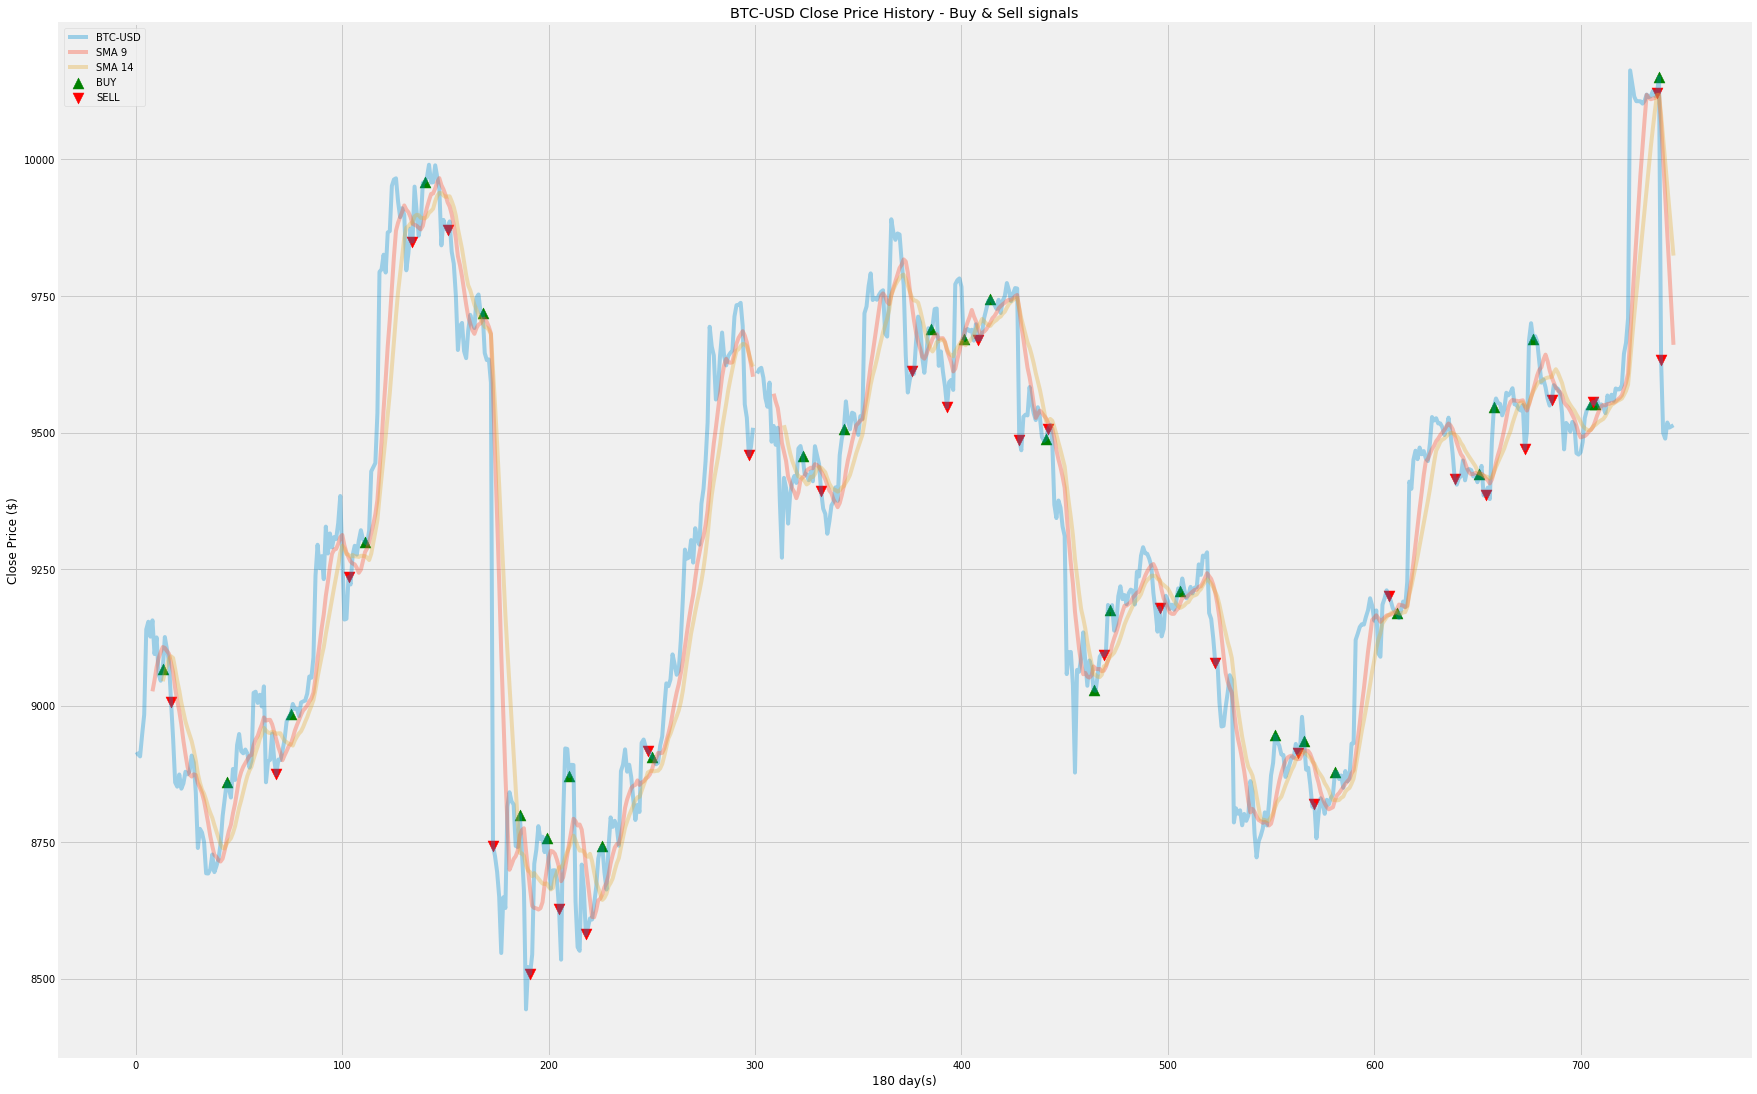

In [31]:
# Plotting the data
plt.figure(figsize=(27, 19))
plt.plot(data['BTC-USD'], label="BTC-USD", alpha=.35)
plt.plot(data['SMA 9'], label="SMA 9", alpha=.35)
plt.plot(data['SMA 14'], label="SMA 14", alpha=.35)
plt.scatter(data.index, data['Buy Signal Price'], label="BUY", marker="^", color='green', s=120)
plt.scatter(data.index, data['Sell Signal Price'], label="SELL", marker="v", color='red', s=120)
plt.title("BTC-USD Close Price History - Buy & Sell signals")
plt.xlabel('180 day(s)')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()